In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split # for splitting data into training and test data
from sklearn.impute import SimpleImputer #for replacing missing values using the impute method
from sklearn.preprocessing import OneHotEncoder #the class for converting categorical values to one hot vectors
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LinearRegression #fitting a regression model

In [2]:
housing_df=pd.read_csv('housing.csv')

In [3]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#checking the shape of the dataframe
housing_df.shape

(20640, 10)

In [5]:
#info function gives a discription of the rows and the columns
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#to check the number of categories exixting in the ocean_proximity attribute and get how many district per category
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


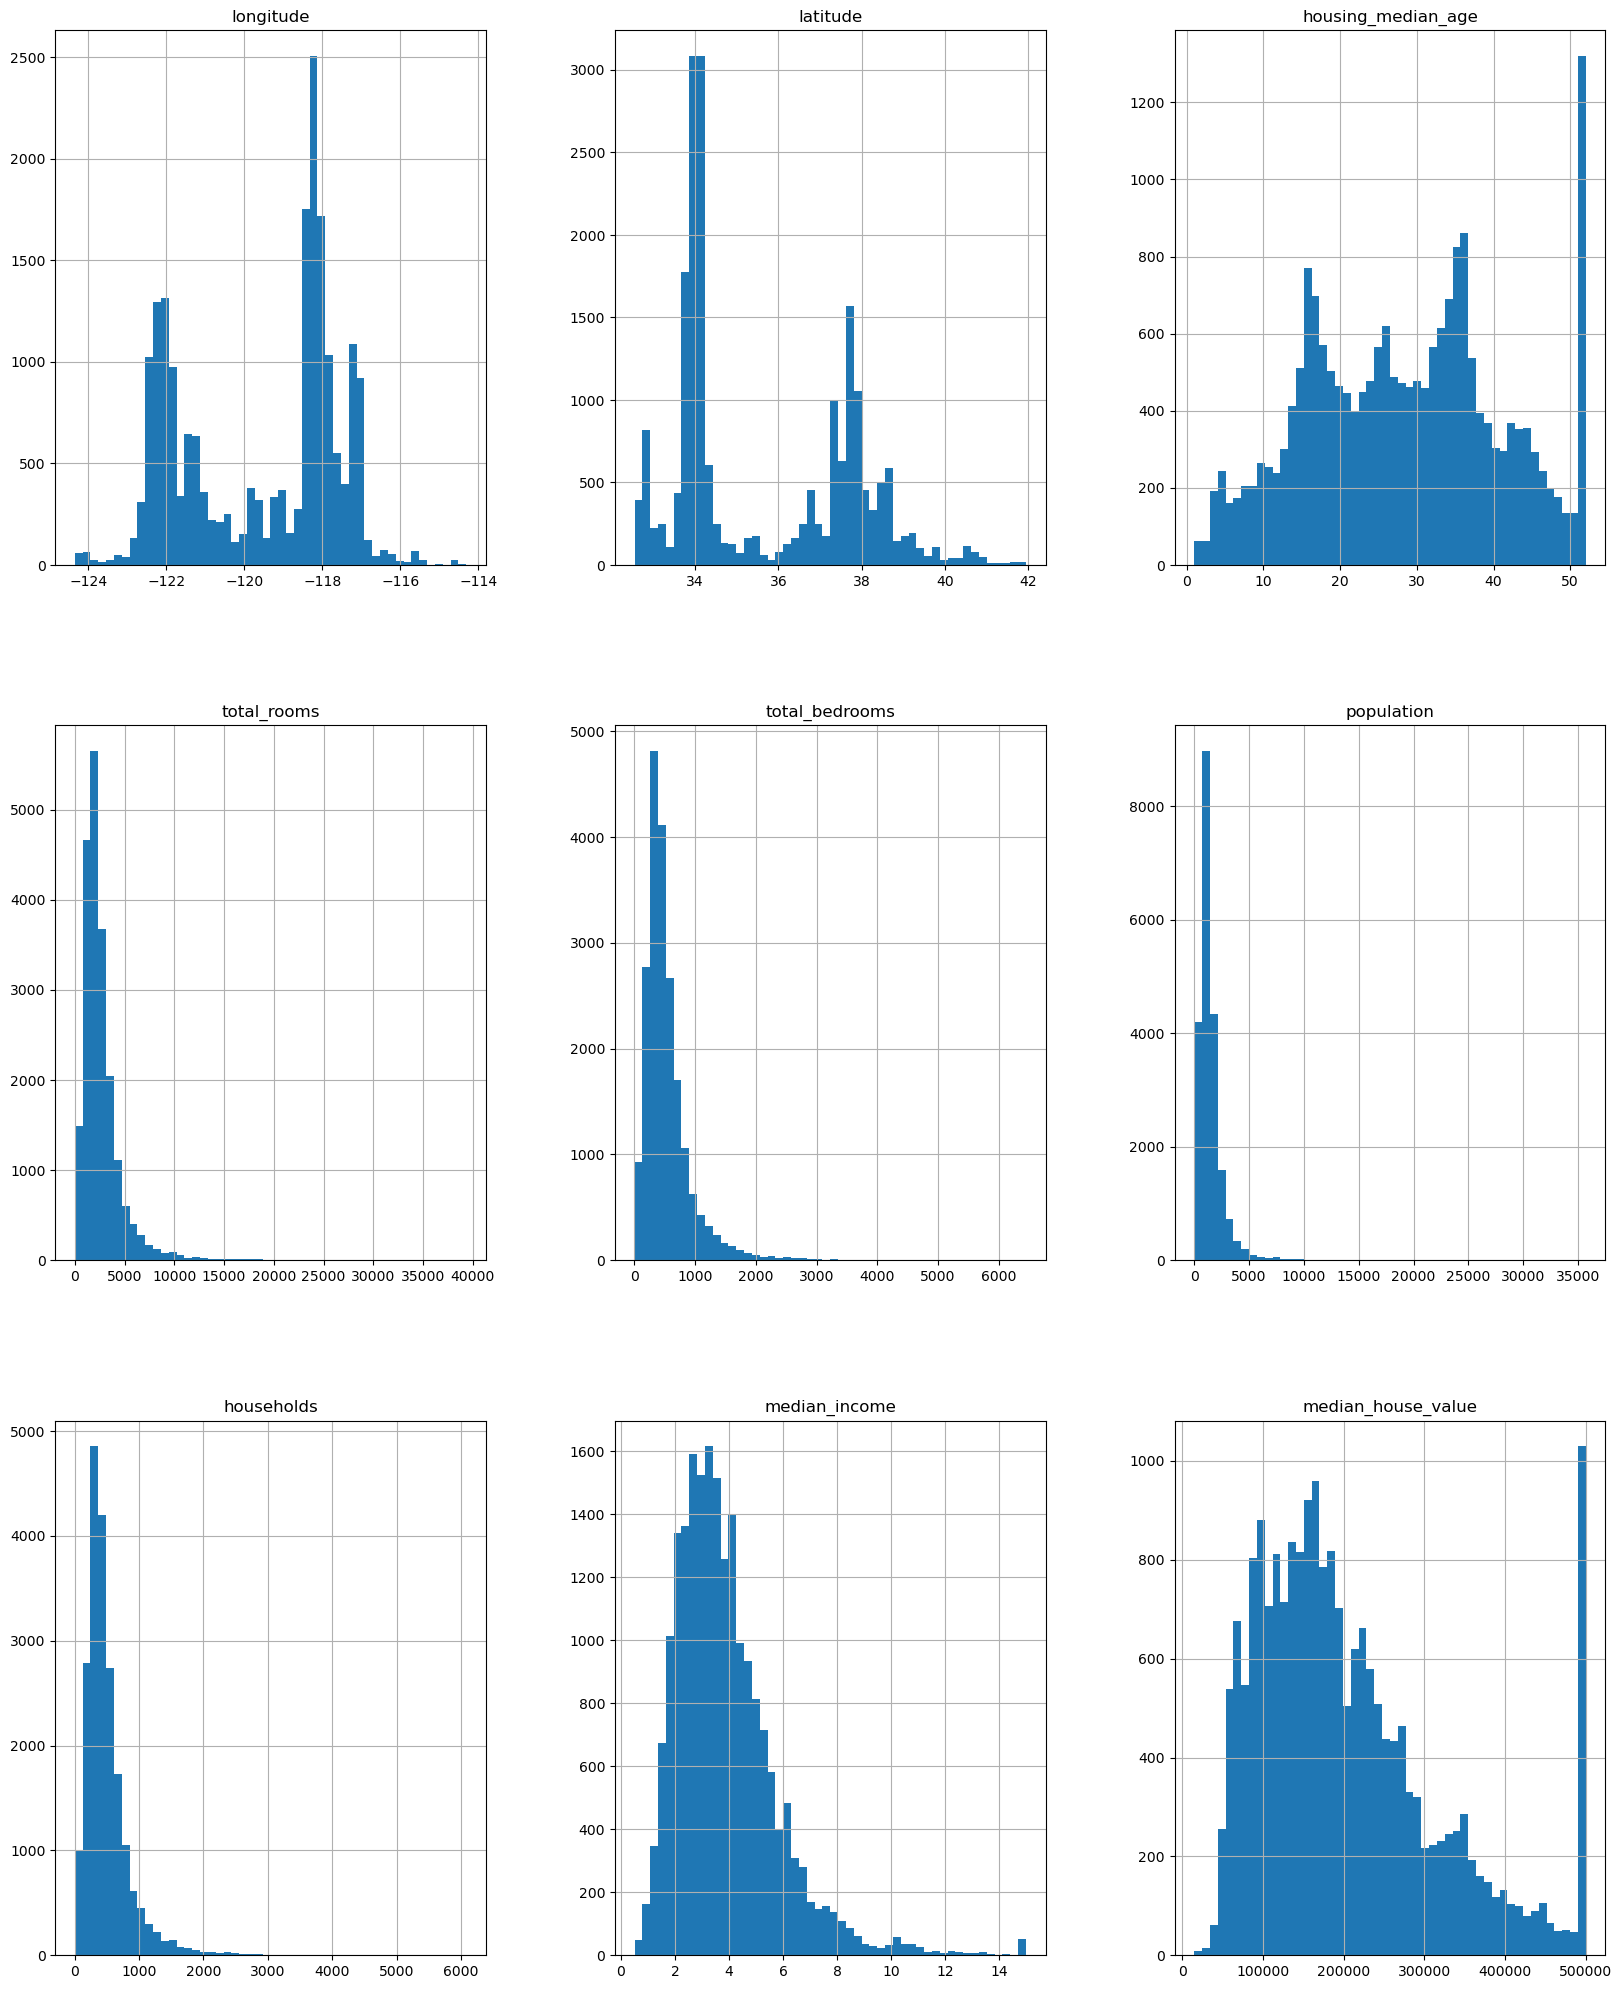

In [8]:
#polting histogram of all the numerical alues in the dataset
#figsize is to specify the width and height of a figure in unnit inches
housing_df.hist(bins=50,figsize=(20,25))
plt.show()

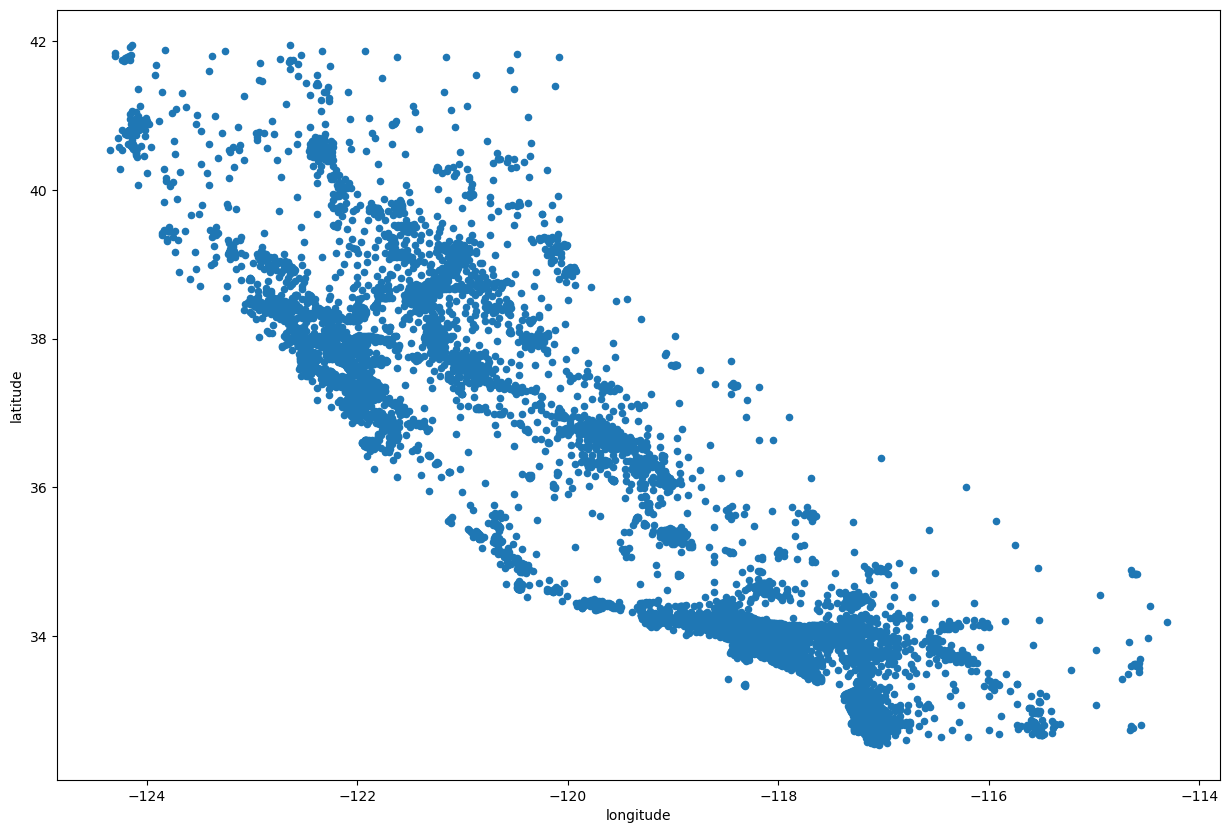

In [9]:
#since we have geographical data we can use to plot scatter plot to visualize the data
housing_df.plot(kind='scatter',x='longitude',y='latitude',figsize=(15,10))
plt.show()

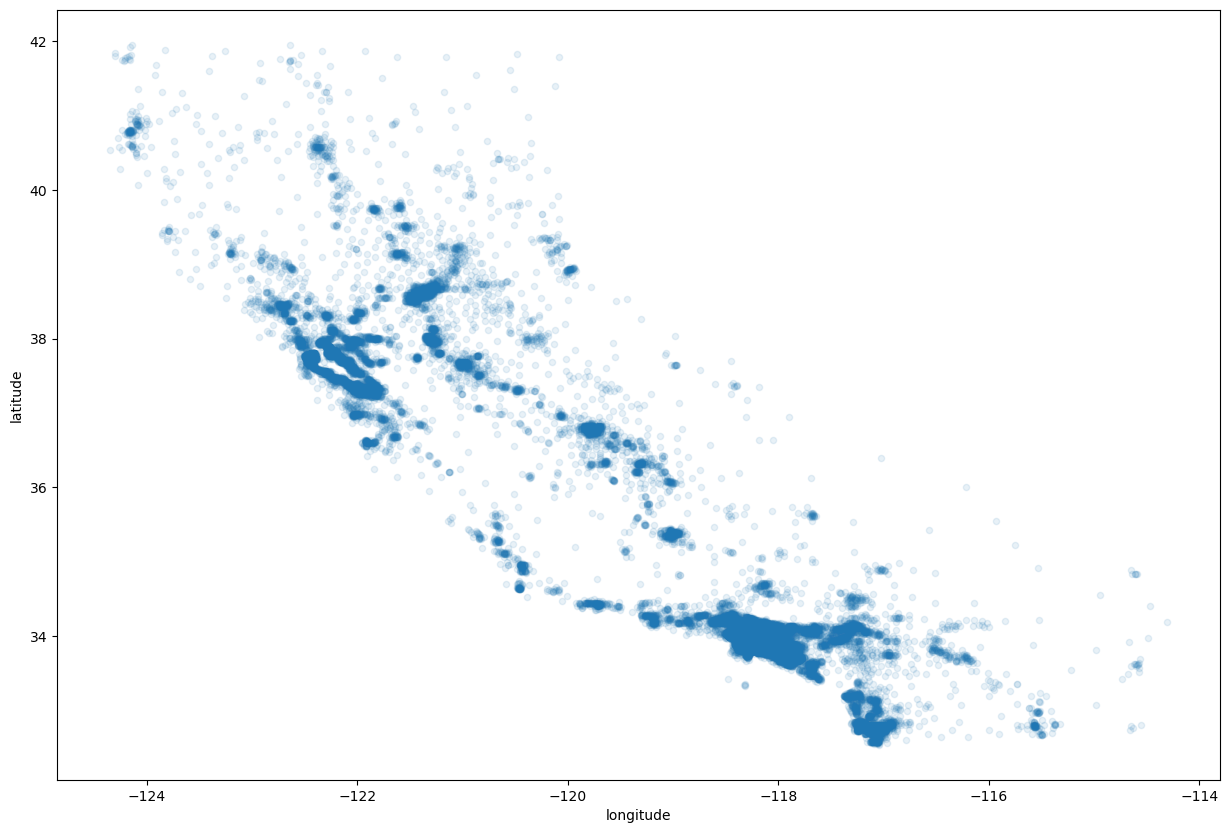

In [10]:
#to adjust the transparency of the plot we adjust the alpha.
housing_df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,figsize=(15,10))
plt.show()

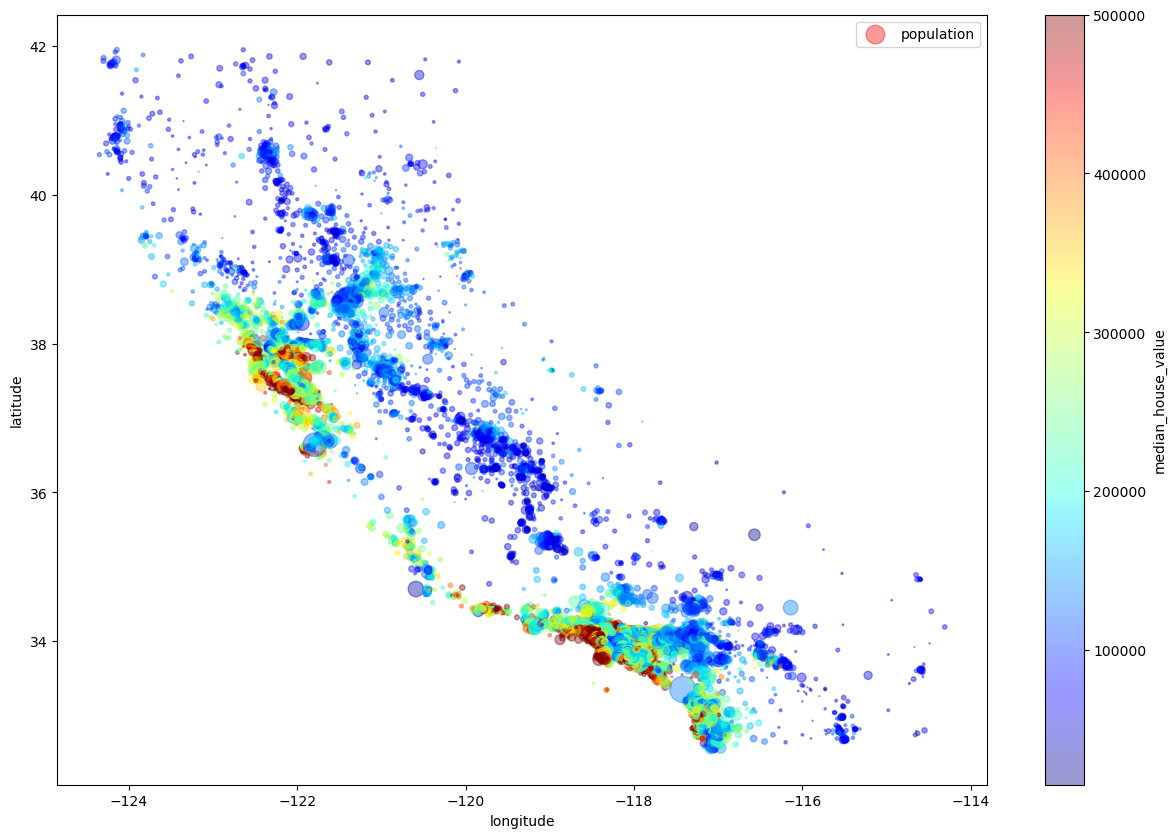

In [11]:
#the radius of the circle represents the population
#the color represents the price 
#the redefined color map ranges from blue(low value) to red (high value)
housing_df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=housing_df['population']/100,label='population',
                figsize=(15,10),c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()
plt.show()

In [12]:
#computing the Pearson correlation coefficient using corr()
#the Pearson correlation coefficient is to measure the strength of the relationship btwn variables 
#values range from -1 to 1
corr_matrix= housing_df.corr()

In [13]:
corr_matrix['median_house_value'].sort_values(ascending=False)
#value close to 1 shows there is a strong positive correlation
#values close to -1 show there ia a strong negative correlation 
#values that a close to zero show there is  no linear correlation

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

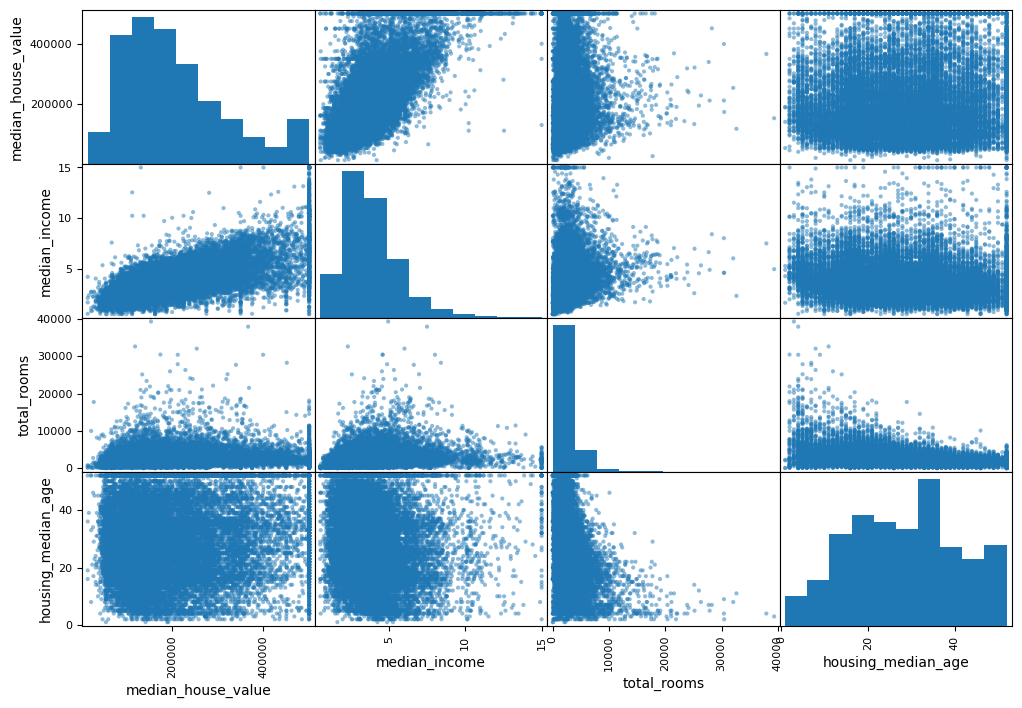

In [14]:
#another method to check the correlation is the pandas scatter_matrix function which plots 
#every numerical attribute against every other numerical attribute.
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing_df[attributes],figsize=(12,8))
plt.show()

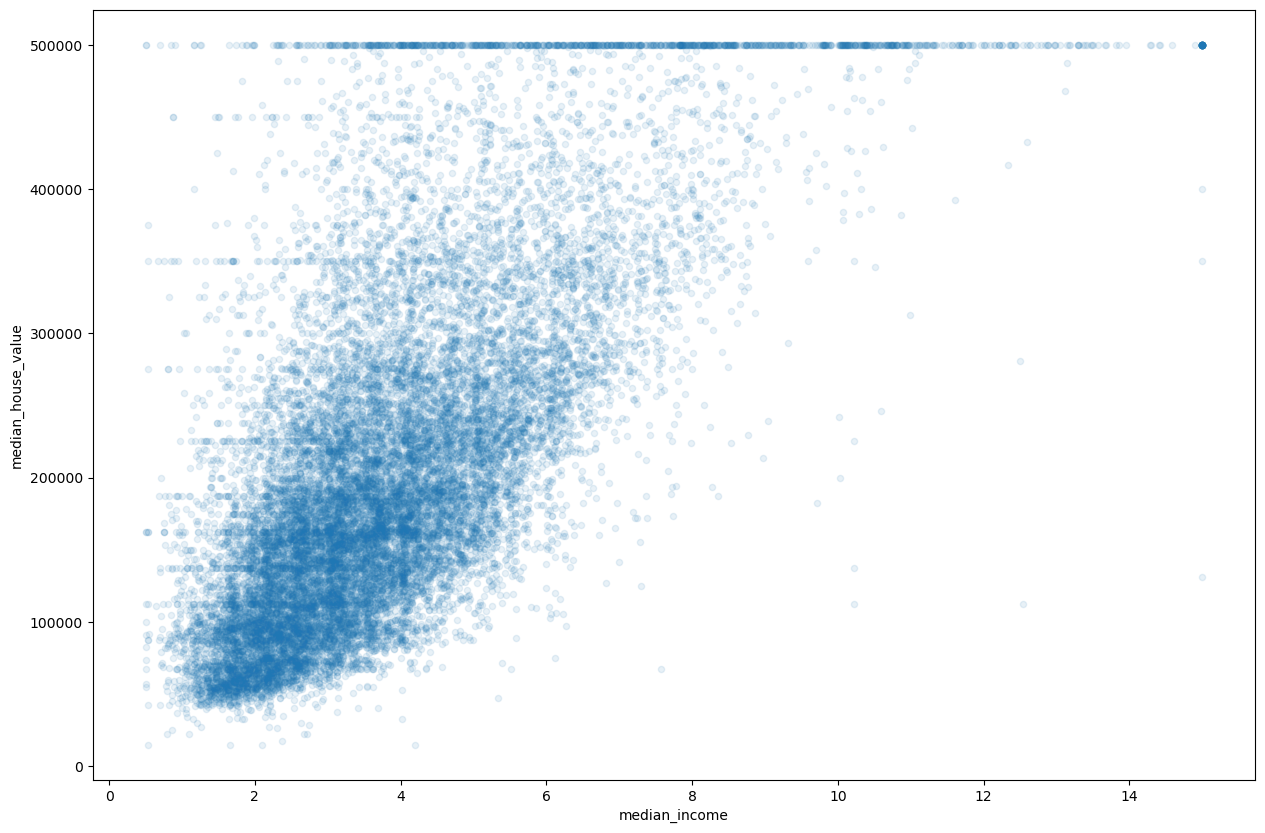

In [15]:
#the promising attribute to predict median house value is median house income
housing_df.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1,figsize=(15,10))
plt.show()

In [16]:
#to verfy quality of data we check for missing value and outlier values
#to check for missing values we us the isnull() method
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

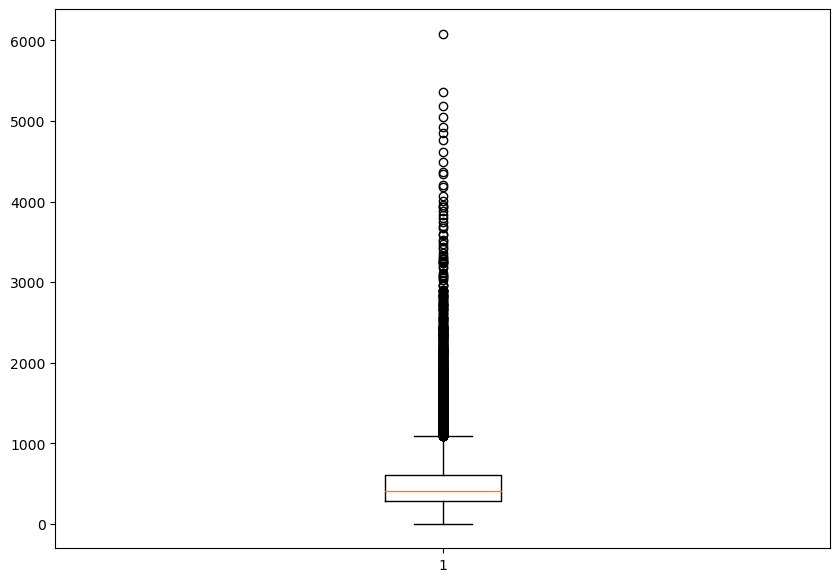

In [17]:
#to check for outliers we use visualizations such as the boxplot
fig=plt.figure(figsize=(10,7))
plt.boxplot(housing_df['households'])
plt.show()

# Data preparation

In [18]:
#to split the data to training and test data we scikit library.
#we import train_test_split method which is contained in the library sklearn.model_selection
#the random state is a hyperparameter that is used to control the randomness involved in ml models to give a constant results
train,test= train_test_split(housing_df,test_size=0.2,random_state=42)

In [19]:
#to check the shape of the train and test data
train.shape,test.shape

((16512, 10), (4128, 10))

# Data cleaning, handling numerical data

In [20]:
#creating a simpleimputer istance and specifying that we want to 
#replace each attributes missing value with median of that attribute.
imputer=SimpleImputer(strategy='median')
#since the median can only be computed by numerical value,we need to create a copy of the data without the text values
train_df=train.drop('ocean_proximity',axis=1)
#now fitting the imputer instance to the numerical data using fit() method
imputer.fit(train_df)


SimpleImputer(strategy='median')

In [21]:
#the imputer simply computes the median of each attribute and stores it in its statistics_instance variable
imputer.statistics_

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1290e+03,  4.3700e+02,
        1.1670e+03,  4.1000e+02,  3.5458e+00,  1.7985e+05])

In [22]:
#applying the imputer to all numerical attributes, to cater for future missing values
train_df.median().values

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1290e+03,  4.3700e+02,
        1.1670e+03,  4.1000e+02,  3.5458e+00,  1.7985e+05])

In [23]:
#using the trained imputer to transform the training set by replacing the missing values with the learned medians
x=imputer.transform(train_df)
#the result is an array to convert it to a dataframe
train_tdf=pd.DataFrame(x,columns=train_df.columns)

# handling categorical features

In [24]:
#ordinal encoding is used whrn the categories have natural ordering
#for our dataset since the ocean_proximity column has categorical values,we will use the one_hot encoding method.
#scikit learn has a class called the OneHotEncoder used to convert categorical values into one_hot vectors

train_ctg=train[['ocean_proximity']]
train_ctg.head(10)

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
17848,<1H OCEAN
6252,<1H OCEAN
9389,NEAR BAY
6113,<1H OCEAN
6061,<1H OCEAN


In [25]:
ctg_encoder= OneHotEncoder()
train_ctg_1hot=ctg_encoder.fit_transform(train_ctg)
train_ctg_1hot #the results is an scipy sparse matrix instead of a numpy array.

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [26]:
#to convert the scipy sparse matrix into a dense numpy array we use the toarray()method
train_ctg_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [27]:
#to get the list of categories
ctg_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Feature engineering
#the process of using domain knowledge to select and transform raw data
to most relevant variable when creating a predictive model using machine learning. 

In [28]:
train['rooms_per_household'] =train['total_rooms']/train['households']
train['bedrooms_per_rooms']=train['total_bedrooms']/train['total_rooms']
train['population_per_household']=train['population']/train['households']

In [29]:
#check the corrilation
corr_matrix=train.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_rooms         -0.257419
Name: median_house_value, dtype: float64

# Feature scalling

In [30]:
#transformation pipeline
train_labels=train['median_house_value'].copy() #output data
#drop the label using the pandas method .drop
train=train.drop('median_house_value',axis=1) # droping column wise,input data
train_df=train.drop('ocean_proximity',axis=1)
train_labels.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

In [31]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_rooms,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND,6.268421,0.180940,2.300000


In [32]:
num_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])
train_tdf=num_pipeline.fit_transform(train_df)

In [33]:
'''scikit has introduced a new class called the ColumnTransfomer 
that transforms both the numerical and categorical values at the same time'''
num_attributes=list(train_df)
ctg_attributes=['ocean_proximity']

full_pipeline=ColumnTransformer([('num',num_pipeline,num_attributes),('ctg',OneHotEncoder(),ctg_attributes)])
train_prepared=full_pipeline.fit_transform(train)
train_prepared


array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

# modeling

In [34]:
'''Linear regression model finds a linear equation that best describes
correlation of independent variable with dependent variables,
this is achieved by fitting a line to the data using least squares'''
#check the shape of our data
train_prepared.shape

(16512, 16)

# linear regression

In [35]:
lin_reg=LinearRegression()
lin_reg.fit(train_prepared,train_labels)

LinearRegression()

In [36]:
#using some training data and training labels to predict
some_data=train.iloc[:5]
some_labels=train_labels.iloc[:5]
#prerare the some data
some_data_prepared= full_pipeline.transform(some_data)
#print predictions
print('Predictions:',lin_reg.predict(some_data_prepared))

Predictions: [181746.54359616 290558.74973505 244957.50017771 146498.51061398
 163230.42393939]


In [37]:
#to measure the this regression model's rmse
from sklearn.metrics import mean_squared_error
train_predictions=lin_reg.predict(train_prepared)
lin_mse=mean_squared_error(train_labels,train_predictions)
lin_rmse= np.sqrt(lin_mse)
lin_rmse

67593.20745775253

# Decision tree regression model

In [38]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(train_prepared,train_labels)

DecisionTreeRegressor()

In [39]:
some_data=train.iloc[:5]
some_labels=train_labels.iloc[:5]
#prerare the some data
some_data_prepared= full_pipeline.transform(some_data)
#print predictions
print('Predictions:',tree_reg.predict(some_data_prepared))

Predictions: [103000. 382100. 172600.  93400.  96500.]


In [40]:
#evaluating the model on the training set
train_predictions=tree_reg.predict(train_prepared)
tree_mse=mean_squared_error(train_labels, train_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [41]:
#performing cross validation on the decision tree regression model using the cross_val_score()method
#cv refers to the number of subsets that our data will be split into
from sklearn.model_selection import cross_val_score 
scores=cross_val_score(tree_reg, train_prepared, train_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores=np.sqrt(-scores)
print('scores:',tree_rmse_scores)
print('mean:',tree_rmse_scores.mean())
print('standard deviation:',tree_rmse_scores.std())


scores: [66392.29583441 69933.19672142 67307.44068143 71094.50102669
 73770.8324276  66926.91551982 67029.78010369 68571.83058758
 68338.51709509 70223.18712057]
mean: 68958.84971182942
standard deviation: 2190.04790899262


In [42]:
#performing cross validation on linear regression model
from sklearn.model_selection import cross_val_score 
lin_scores=cross_val_score(lin_reg, train_prepared, train_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores=np.sqrt(-lin_scores) 
print('scores:',lin_rmse_scores)
print('mean',lin_rmse_scores.mean())
print('standard deviation',lin_rmse_scores.std())

scores: [65000.67382615 70960.56056304 67122.63935124 66089.63153865
 68402.54686442 65266.34735288 65218.78174481 68525.46981754
 72739.87555996 68957.34111906]
mean 67828.38677377408
standard deviation 2468.0913950652284


In [43]:
#Random forest regression model
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(train_prepared, train_labels)
train_predictions=forest_reg.predict(train_prepared)
forest_mse=mean_squared_error(train_labels, train_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

18462.812428288315

In [44]:
#performing cross validation on our random forest regression model
forest_scores=cross_val_score(forest_reg, train_prepared,train_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
print('scores:',forest_rmse_scores)
print('mean',forest_rmse_scores.mean())
print('standard deviation',forest_rmse_scores.std())

scores: [47193.78354659 51873.53281872 49348.8968641  51545.12938979
 52373.50308064 47159.69848384 47691.04511392 50704.24185619
 49376.41546363 49985.25575498]
mean 49725.15023723953
standard deviation 1826.4185202553147


In [45]:
#fine tuning a model
#using the grid search
from sklearn.model_selection import GridSearchCV

param_grid=[ {'n_estimators': [3,10,30],'max_features': [2,4,6,8]},{'bootstrap': [False],'n_estimators': [3,10],'max_features': [2,3,4]},]

forest_reg=RandomForestRegressor()

grid_search=GridSearchCV(forest_reg, param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(train_prepared, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [46]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [47]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [48]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64238.77340654457 {'max_features': 2, 'n_estimators': 3}
54609.85065252315 {'max_features': 2, 'n_estimators': 10}
52332.67128977396 {'max_features': 2, 'n_estimators': 30}
60972.44676386348 {'max_features': 4, 'n_estimators': 3}
52539.40096701628 {'max_features': 4, 'n_estimators': 10}
50195.678813274084 {'max_features': 4, 'n_estimators': 30}
58731.4549833779 {'max_features': 6, 'n_estimators': 3}
51711.44423773312 {'max_features': 6, 'n_estimators': 10}
49909.773596582054 {'max_features': 6, 'n_estimators': 30}
58358.50711228276 {'max_features': 8, 'n_estimators': 3}
51578.95528708824 {'max_features': 8, 'n_estimators': 10}
50133.54095441127 {'max_features': 8, 'n_estimators': 30}
62063.77386011299 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53980.23043398566 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60056.519205998586 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52212.28884073799 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [49]:
#saving our model in a file
import pickle
filename='forest_housing_model.pkl'
pickle.dump(grid_search.best_estimator_,open(filename,'wb'))